<a href="https://colab.research.google.com/github/priyanshu0827/Projects/blob/main/CSI_internship_Customerlifetimevalueprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


try:
    df = pd.read_excel("online_retail_II.xlsx")
    print(df.head())
except Exception as e:
    print(f"Error: {e}")

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
#creating grouping around the CUstomer ID and aggregate the metrices
max_date= df['InvoiceDate'].max()
df2 = df.groupby('Customer ID').agg(
    {'InvoiceDate':lambda x: (max_date-x.min()).days,
     'Invoice': lambda x: len(x),
     'Quantity': lambda x: x.sum(),
     'Price': lambda x: x.sum()})
df2.head()

,InvoiceDate,Invoice,Quantity,Price
Customer ID,,,,
12346.0,360,46,52,578.36
12347.0,39,71,828,162.95
12348.0,73,20,373,14.39
12349.0,370,107,988,899.49
12351.0,10,21,261,49.46


In [9]:
max_date

Timestamp('2010-12-09 20:01:00')

In [17]:
def customer_model(data):
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
  max_date = data['InvoiceDate'].max()
  data = data.groupby(by='Customer ID').agg(
      {'InvoiceDate': lambda x: (max_date - x.min()).days,
       'Invoice': lambda x: len(x),
       'Quantity': lambda x: x.sum(),
       'Price': lambda x: x.sum()})
  return data
data = customer_model(df)


In [18]:
data.head()

,InvoiceDate,Invoice,Quantity,Price
Customer ID,,,,
12346.0,360,46,52,578.36
12347.0,39,71,828,162.95
12348.0,73,20,373,14.39
12349.0,370,107,988,899.49
12351.0,10,21,261,49.46


In [20]:
data.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'UnitPrice': 'MonetaryValue'}, inplace=True)
data = data[data['Quantity'] > 0]

In [21]:
data.head()

,Recency,Frequency,Quantity,Price
Customer ID,,,,
12346.0,360,46,52,578.36
12347.0,39,71,828,162.95
12348.0,73,20,373,14.39
12349.0,370,107,988,899.49
12351.0,10,21,261,49.46


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

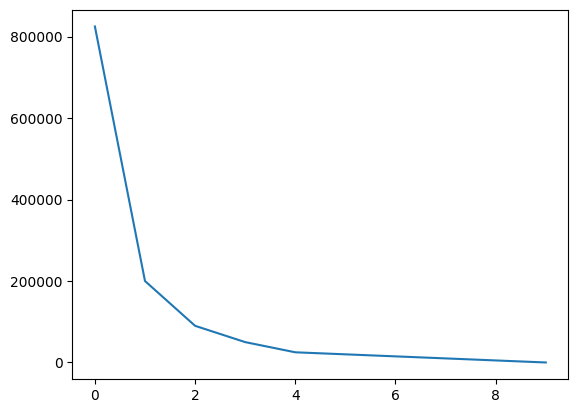

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.DataFrame({
    'CLTV': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
})


inertia = []


for i in np.arange(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['CLTV']])
    inertia.append(kmeans.inertia_)


plt.plot(inertia)


In [23]:
data['AOV'] = data['Price'] / data['Frequency']
data

,Recency,Frequency,Quantity,Price,AOV
Customer ID,,,,,
12346.0,360,46,52,578.36,12.573043
12347.0,39,71,828,162.95,2.295070
12348.0,73,20,373,14.39,0.719500
12349.0,370,107,988,899.49,8.406449
12351.0,10,21,261,49.46,2.355238
...,...,...,...,...,...
18283.0,293,230,336,498.82,2.168783
18284.0,66,29,493,116.09,4.003103
18285.0,295,12,145,100.20,8.350000


In [24]:
#calculate the purchase frequency
purchase_freq = sum(data['Frequency'])/len(data)
purchase_freq

97.29295051353876

In [26]:
#calculate the repeate rate
repeat_rate = data[data['Frequency'] > 1].shape[0]/data.shape[0]
repeat_rate

0.9808590102707749

In [27]:
#calculate the churn rate
churn_rate = 1 - repeat_rate
churn_rate

0.019140989729225066

In [28]:
data['profit_margin'] = data['Price'] * .10
data.head()

,Recency,Frequency,Quantity,Price,AOV,profit_margin
Customer ID,,,,,,
12346.0,360,46,52,578.36,12.573043,57.836
12347.0,39,71,828,162.95,2.295070,16.295
12348.0,73,20,373,14.39,0.719500,1.439
12349.0,370,107,988,899.49,8.406449,89.949
12351.0,10,21,261,49.46,2.355238,4.946


In [29]:
data['CLTV'] = ((data['AOV']*purchase_freq)/churn_rate)*.10
data.head()

,Recency,Frequency,Quantity,Price,AOV,profit_margin,CLTV
Customer ID,,,,,,,
12346.0,360,46,52,578.36,12.573043,57.836,6390.832001
12347.0,39,71,828,162.95,2.295070,16.295,1166.575899
12348.0,73,20,373,14.39,0.719500,1.439,365.719218
12349.0,370,107,988,899.49,8.406449,89.949,4272.967067
12351.0,10,21,261,49.46,2.355238,4.946,1197.158907


In [30]:
import seaborn
print("The median CLTV is", data['CLTV'].median())
print("The average CLTV is", data['CLTV'].mean())

The median CLTV is 1535.2129339018284
The average CLTV is 2356.8686665939476


In [31]:
data.sort_values(by='CLTV').reset_index()

,Customer ID,Recency,Frequency,Quantity,Price,AOV,profit_margin,CLTV
0,14103.0,300,1,5,0.00,0.000000,0.000,0.000000
1,14827.0,300,1,5,0.00,0.000000,0.000,0.000000
2,13687.0,73,45,87167,6.81,0.151333,0.681,76.922180
3,14033.0,190,1,576,0.19,0.190000,0.019,96.576305
4,14845.0,234,1,600,0.25,0.250000,0.025,127.074085
...,...,...,...,...,...,...,...,...
4279,14079.0,317,1,1,243.63,243.630000,24.363,123836.237671
4280,14028.0,185,13,4679,3627.90,279.069231,362.790,141849.869015
4281,15413.0,373,27,2692,9416.82,348.771111,941.682,177279.079786
4282,14063.0,366,44,3846,39920.95,907.294318,3992.095,461174.382562


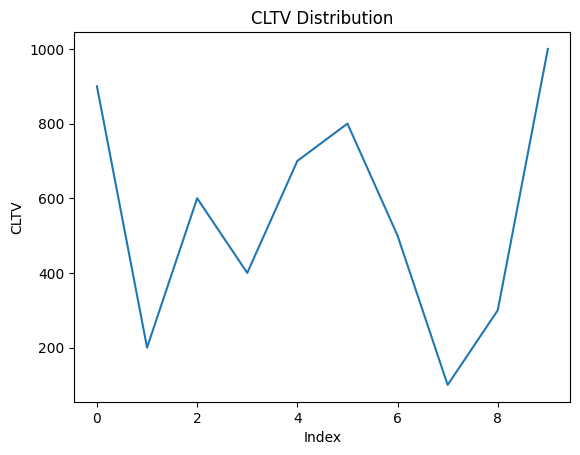

In [25]:
df['CLTV'].plot()

plt.title('CLTV Distribution')
plt.xlabel('Index')
plt.ylabel('CLTV')
plt.show()